In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
df = pd.read_parquet('../reviews/reviews.parquet')
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df['voted_up_numeric'] = df['voted_up'].map({True: 1, False: 0})

columns_to_drop = ['steam_purchase', 
                   'language', 
                   'timestamp_updated', 
                   'author', 
                   'votes_funny',
                   'voted_up',
                   'votes_up', 
                   'written_during_early_access', 
                   'received_for_free',
                   'playtime_at_review',
                   'weighted_vote_score',]

df.rename(columns={'review': 'text', 'voted_up_numeric': 'label'}, inplace=True)

df.drop(columns=columns_to_drop, inplace=True)

In [78]:
df.head()

,game,text,label
0,550,.,1
1,774361,"o jogo é legalzinho, por mais que pelo trailer...",1
2,322330,mt bom,1
3,730,top,1
4,221100,meupau,1


In [79]:
n_rows = df.shape[0]
n_games = len(df['game'].unique())


print(f'Reviews: {n_rows}')
print(f'Quantidade de jogos: {n_games}')

Reviews: 2110458
Quantidade de jogos: 808


In [80]:
count_positive_reviews = df[df['text'] == '👍'].shape[0]
print(f"Reviews que contém apenas 👍: {count_positive_reviews}")

Reviews que contém apenas 👍: 1355


In [81]:
df.drop(df[df['text'] == '👍'].index, inplace=True)

In [82]:
n_rows = df.shape[0]
n_games = len(df['game'].unique())


print(f'Reviews: {n_rows}')
print(f'Quantidade de jogos: {n_games}')

Reviews: 2109103
Quantidade de jogos: 808


In [83]:
df = df[df['text'].str.split().str.len() >= 4]

In [84]:
n_rows = df.shape[0]
n_games = len(df['game'].unique())


print(f'Reviews: {n_rows}')
print(f'Quantidade de jogos: {n_games}')

Reviews: 1320812
Quantidade de jogos: 800


/var/folders/kl/n_yd388n3n38s861kmsjpvqw0000gn/T/ipykernel_56836/1837967194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette={'1': 'green', '0': 'red'}, legend=False)
/var/folders/kl/n_yd388n3n38s861kmsjpvqw0000gn/T/ipykernel_56836/1837967194.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negativo', 'Positivo'], rotation=0, fontsize=14)


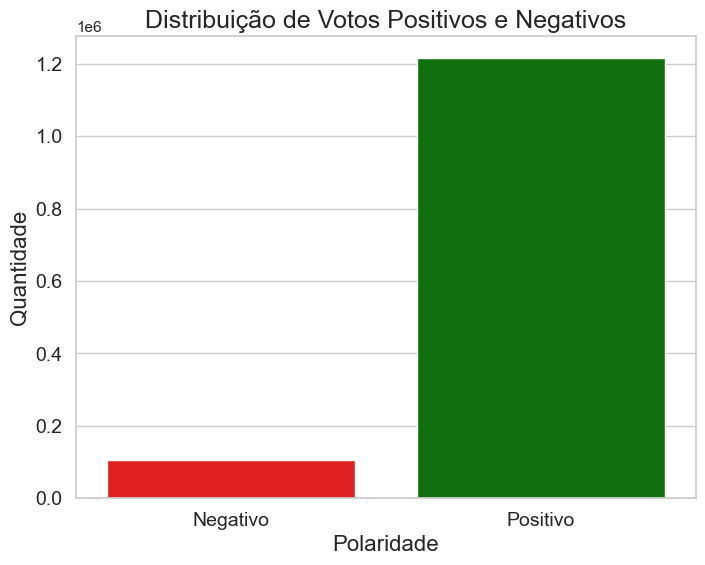

In [85]:
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df, palette={'1': 'green', '0': 'red'}, legend=False)

ax.set_xticklabels(['Negativo', 'Positivo'], rotation=0, fontsize=14)

ax.set_xlabel('Polaridade', fontsize=16)
ax.set_ylabel('Quantidade', fontsize=16)
ax.set_title('Distribuição de Votos Positivos e Negativos', fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [86]:
from nltk.corpus import stopwords
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def preparar_texto(texto):
    if isinstance(texto, str):  # Verificar se o valor é uma string
        texto = texto.lower()
        texto = remove_emojis(texto)  # Remover emojis
        texto = texto.replace(',', '')  # Remover vírgulas
        tokens = texto.split()
        tokens_limpos = [palavra for palavra in tokens if palavra not in stopwords_set]
        return ' '.join(tokens_limpos)
    return ''

stopwords_set = set(stopwords.words('portuguese'))

df['cleaned_text'] = df['text'].apply(preparar_texto)


In [87]:
df.head()

,game,text,label,cleaned_text
1,774361,"o jogo é legalzinho, por mais que pelo trailer...",1,jogo legalzinho trailer pareça metroidvania qu...
5,70,Jogo perfeito. Valve nunca me decepciona,1,jogo perfeito. valve nunca decepciona
6,270880,"Como fã de ETS 1 e 2, gostei muito do ATS, ape...",1,fã ets 1 2 gostei ats apenas achei consumo com...
9,1222680,[b]Super Recomendo[/b]Irei avaliar este jogo c...,1,[b]super recomendo[/b]irei avaliar jogo base [...
11,268910,"Jogo é bom, porém muito fácil !!! 24 hrs pai b...",1,jogo bom porém fácil !!! 24 hrs pai boto 100% ...


In [88]:
df[df['label'] == False].head()

,game,text,label,cleaned_text
88,2195250,comprei esse jogo e sumiu da minha biblioteca ...,0,comprei jogo sumiu biblioteca q fazer ?????ago...
100,289070,2K acabou com o jogo. UMA BOSTA.,0,2k acabou jogo. bosta.
119,477160,"jogo muito bom,mas se vc jogar por 1 minuto, O...",0,jogo bommas vc jogar 1 minuto jogo literalment...
155,252950,muito dahora pra passar o tempo... mas enjoa,0,dahora pra passar tempo... enjoa
184,2195250,..........Infelizmente minha experiência acabo...,0,..........infelizmente experiência acabou send...


In [89]:
df.drop(columns=['text'], inplace=True)
df.rename(columns={'cleaned_text': 'text'}, inplace=True)
df.reset_index(drop=True, inplace=True)

In [90]:
df.to_parquet('../reviews/reviews_cleaned.parquet', index=False)

In [91]:
df = pd.read_parquet('../reviews/reviews_cleaned.parquet')
df.head()

,game,label,text
0,774361,1,jogo legalzinho trailer pareça metroidvania qu...
1,70,1,jogo perfeito. valve nunca decepciona
2,270880,1,fã ets 1 2 gostei ats apenas achei consumo com...
3,1222680,1,[b]super recomendo[/b]irei avaliar jogo base [...
4,268910,1,jogo bom porém fácil !!! 24 hrs pai boto 100% ...


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320812 entries, 0 to 1320811
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   game    1320812 non-null  int64 
 1   label   1320812 non-null  int64 
 2   text    1320812 non-null  object
dtypes: int64(2), object(1)
memory usage: 30.2+ MB
